# Salary Predictions Based on Job Descriptions

### ---- 1 Define the Problem ----

The problem addressed in this project entails how HR department can offer reasonable salary to staff and thereby be able to reduce unnecessary cost to the company while maintaining postive employee motivation.  

In [66]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA



__author__ = "Anteneh Gebretsadik"
__email__ = "anteneh.g.zewdu@gmail.com"

### ---- 2 Load the Data ----

In [5]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('C:/salarypredictionportfolio/data/train_features.csv')
test_features = pd.read_csv('C:/salarypredictionportfolio/data/test_features.csv')
train_salaries = pd.read_csv('C:/salarypredictionportfolio/data/train_salaries.csv')

### ---- 3 Clean the Data ----

In [6]:
# Checking first 10 columns of train_features data
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
# Checking first 10 columns of test_features data
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [8]:
# Checking first 10 columns of train_salaries data
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [9]:
# Merging feature and target variable in one dataframe
train = pd.merge(train_features, train_salaries, on='jobId')

In [10]:
del train_features
del train_salaries

In [11]:
# Checking the first 10 columns of Combined dataframe
train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [12]:
# Checking the shape of the recently merged data
print("Shape of Recently Merged Data :" ,train.shape)

Shape of Recently Merged Data : (1000000, 9)


In [13]:
# Checking the info of the recently merged data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [14]:
# Checking duplicate values in merged dataframe
train.duplicated().sum()

0

In [15]:
# Checking for missing values
train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

As it can be seen above, there is no missing value.

### ----4 Exploring the Data / EDA ----

In [16]:
# Summarizing numerical variable 
train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [17]:
# Summarizing categorical variable 
train.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684944959,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


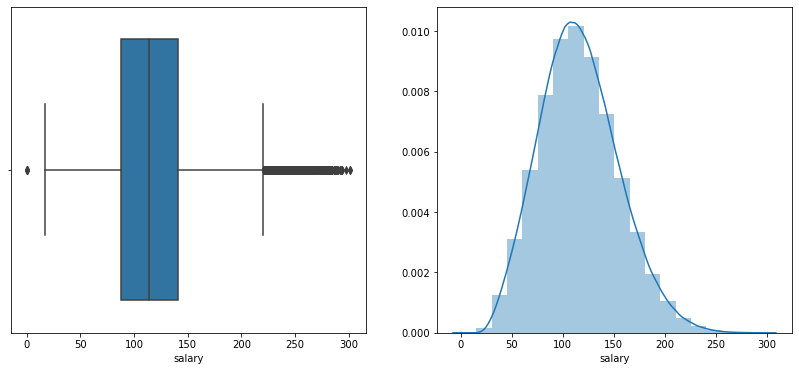

In [18]:
# Visualizing the tagret variable i.e salary
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train.salary)
plt.subplot(1,2,2)
sns.distplot(train.salary, bins=20)
plt.show()

As evidenced above, there are potential outliers we have to deal with.

In [19]:
# Using IQR to detect and remove outliers in the target variable i.e salary
stat=train.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {} .'.format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5 .


In [20]:
# Outliers below the lower bound
train[train.salary < lower]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
# Outliers above the upper bound
train.loc[train.salary > upper, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

As evidenced above, it is plausible for senior level roles to earn a high salary. But it does not make sense why junior level roles are making a high salary. Thus, this needs further investigation.

In [22]:
# Checking the most suspicious potential outliers above upper bound
train[(train.salary > upper) & (train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


As evidenced above, these junior roles have high years of experience and all of these junior roles belong to high paying sectors, Oil & Finance. Hence, owing to these reasons, the high salaries for these junior roles make sense.

In [23]:
# Removing data with 0 salaries
train = train[train.salary > lower]

In [24]:
# Checking the status again
train.salary.describe()

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

The 0 salary is removed.

### Defining Plot Module

In [25]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

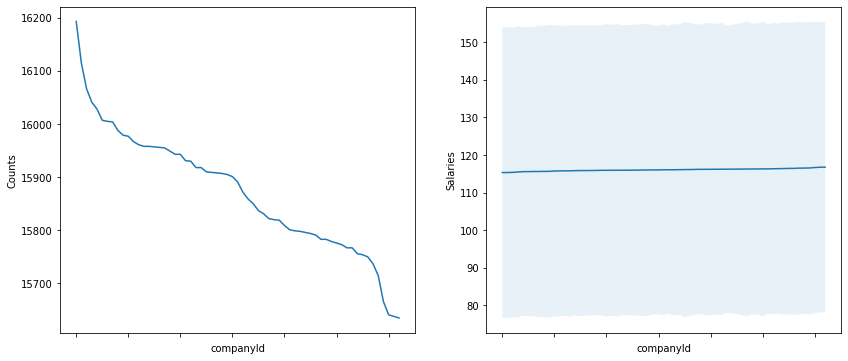

In [26]:
plot_feature(train, 'companyId')

Salary is weakly associated with companies.

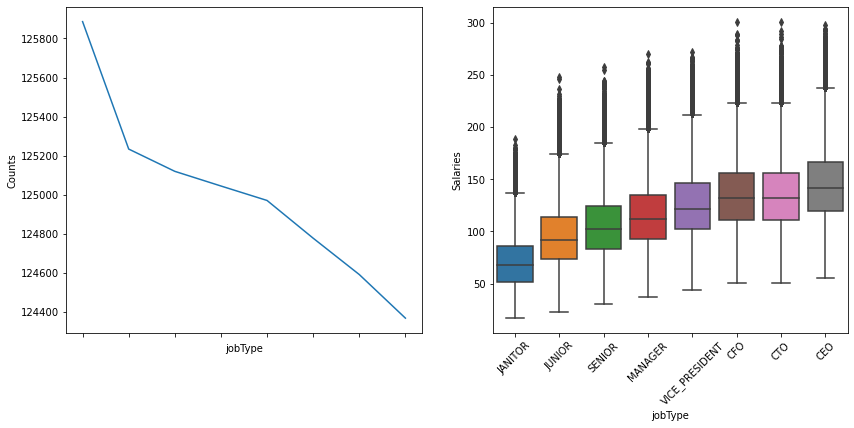

In [27]:
plot_feature(train, 'jobType')

Salary is positvely correlated with job type.

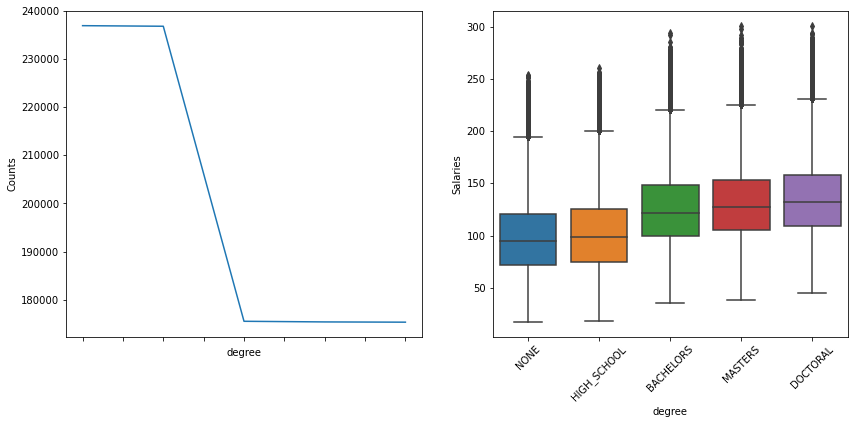

In [28]:
plot_feature(train, 'degree')

High salaries tend to correspond to advanced degrees.

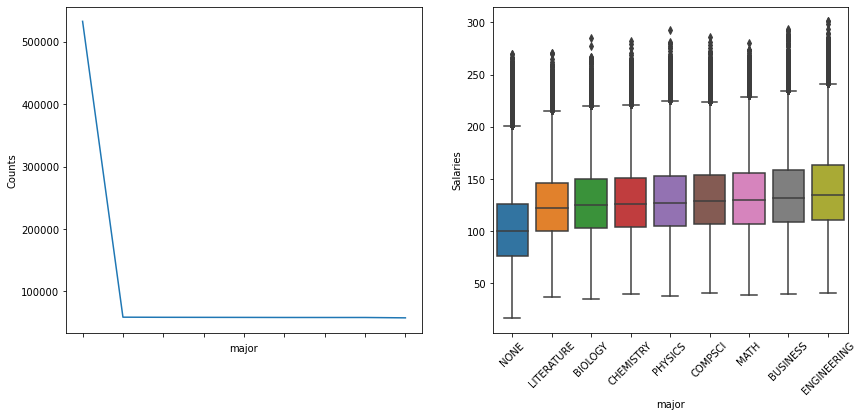

In [29]:
plot_feature(train, 'major')

Employees with majors of engineering, business and math have corresponding high salaries.

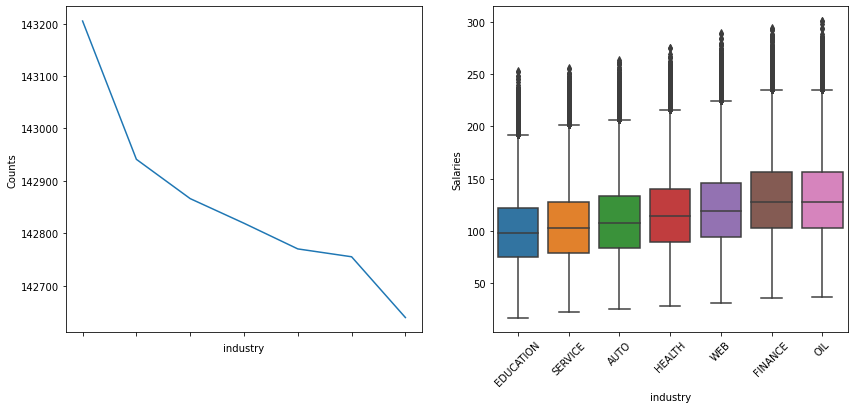

In [31]:
plot_feature(train, 'industry')

Higher salaries correspond to Oil, Finance and Web industries.

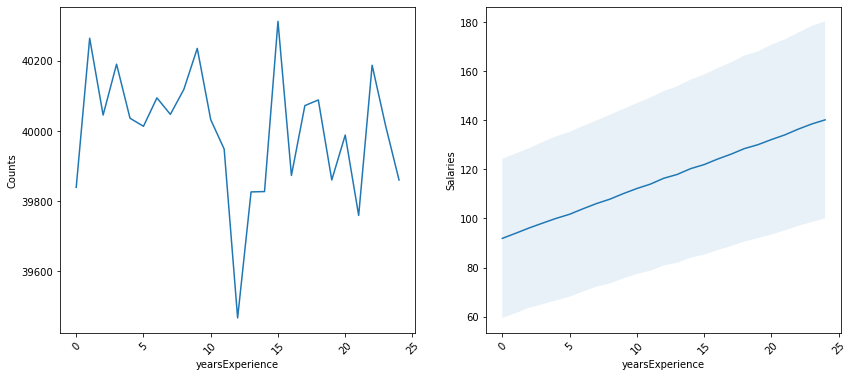

In [37]:
plot_feature(train, 'yearsExperience')

Salary is directly correlated with years of experience.

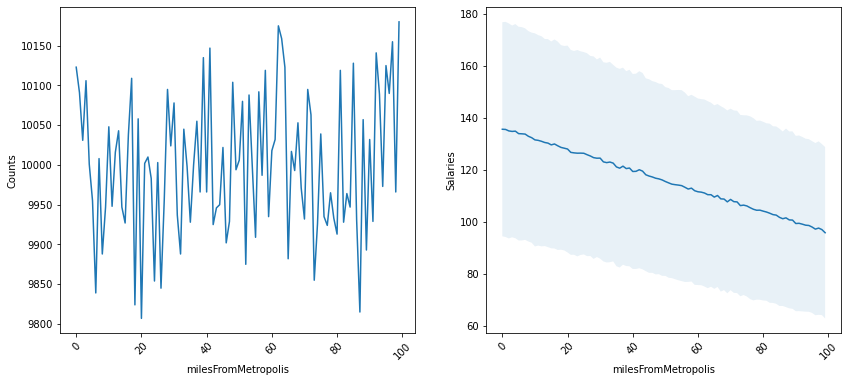

In [38]:
plot_feature(train, 'milesFromMetropolis')

Salaries decrease as you go further away from the metropolis.

### Visualizing the Correlation across all Columns

In [39]:
# Functions to display correlation across all columns
def Encode_Data(dataframe):   
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe


def Display_Correlation(EncodedData):
    plt.figure(figsize=(12,10))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="Greens",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
    plt.show()

In [40]:
VisualData = train.copy()

In [41]:
VisualData.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [42]:
VisualData = VisualData.drop(['jobId'],axis=1)

In [43]:
# Encoding categorical vairable into integer form
EncodedData = Encode_Data(VisualData)

In [44]:
EncodedData.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,113
1,11,0,2,7,6,3,73,84
2,48,7,1,8,3,10,38,120
3,32,5,1,2,0,8,17,125
4,60,7,0,8,2,8,16,146


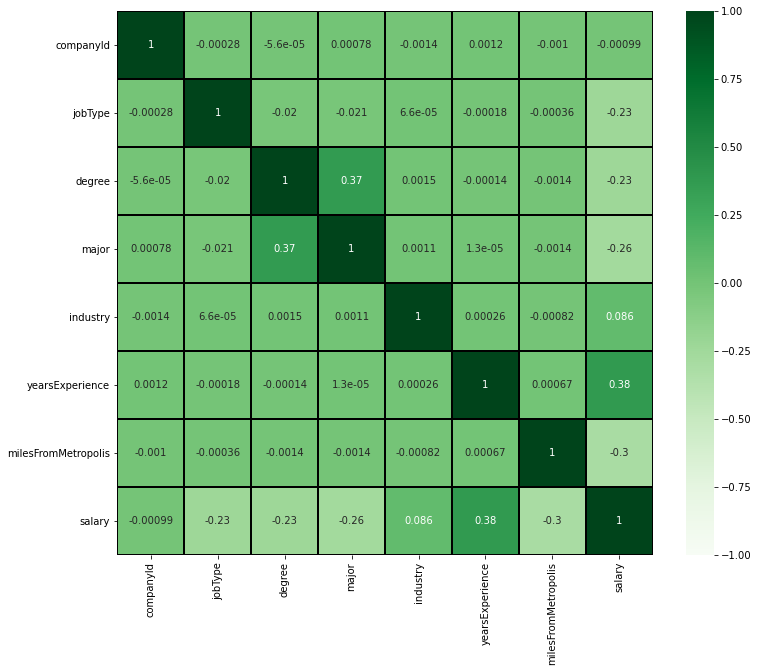

In [45]:
#Pass encoded data to visualise correlation between columns
Display_Correlation(EncodedData)

As observed above, jobType is most strongly correlated with salary followed by degree, major and yearsExperience.

### ---- 5 Establish a Baseline ----

In [51]:
# select a reasonable metric (MSE in this case)
# create an extremely simple model and measure its efficacy
# e.g. use "average salary" for each industry as your model and then measure MSE
# during 5-fold cross-validation
# add average 


from sklearn.model_selection import KFold
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
    
#train_data_clean['salary'] = np.log1p(train_data_clean['salary'])
salary_pred = VisualData['salary']
k_folds = KFold(n_splits=5)
mean_squared_error_folds = []

for train, test in k_folds.split(salary_pred):
    
    # load train salary data
    train_salary = salary_pred.iloc[train]
    
    # generate average for train data
    average_salary = np.empty(len(train_salary))
    average_salary.fill(np.average(train_salary))
    
    # print the mean squarred error
    mean_squared_error_folds.append(mean_squared_error(train_salary, average_salary))
    #mean_squared_error(train_salary, average_salary)
    
print(np.average(mean_squared_error_folds))

1499.008565239748


### ---- 6 Hypothesize Solution ----

The baseline model predicts the salary based on the data provided without fitting, feature generation or tunning.

Supervised Machine Learning algorithms will be used to enhance the prediction results. Regression and Ensembles of Regression Algorithms are suitable for our data and objective.

The three models selected to enhance results over the baseline model given above are:

a)   LinearRegression - sometimes simple is best

b)  RandomForestRegressor - improved accuracy and control over-fittings 

c) GradientBoostingRegressor - can optimise on Least Squares regression

### Setting the Metrics


<b>The Metrics chosen is MSE and efficacy goal is <320


### ---- 7 Defining Data Class  ----

In [47]:
#make sure that data is ready for modeling

#create any new features needed to potentially enhance model

class Data:
    def __init__(self, train_feature_file, train_salaries_file, test_file, cat_cols, num_cols, salaries_col, id_col):
        
        #create train and test dataframe
    
        #create new copies instead of references
        self.cat_cols = list(cat_cols)
        self.num_cols = list(num_cols)
        self.feature_cols = cat_cols + num_cols
        self.salaries_col = salaries_col
        self.id_col = id_col
        self.label_encoders = {}
        self.train_df = self._create_train_df(train_feature_file, train_salaries_file)
        self.test_df = self._create_test_df(test_file)
        self.results_df = pd.DataFrame(self.test_df)
    
    def label_encode_df(self, df, cols):
        # creates one label encoder for each column in the data object instance
        for col in cols:
            if col in self.label_encoders:
                #if label encoder already exits for col, use it
                self._label_encode(df, col, self.label_encoders[col])
            else:
                self._label_encode(df, col)
    
    def inverse_encode_df(self, df, cols):
        #does inverse label encoding
        for col in cols:
            if col in self.label_encoders:
                self._inverse_label_encode(df, col)  
            else:
                raise ValueError("label_encoders must be define for each col before calling inverse_encode_df")

    def _label_encode(self, df, col, le=None):
        # label encodes data
        if le:
            df[col] = le.transform(df[col])
        else:
            le = LabelEncoder()
            le.fit(df[col])
            df[col] = le.transform(df[col])
            self.label_encoders[col] = le
        
    def _inverse_label_encode(self, df, col):
        # inverse label encodes data
        le = self.label_encoders[col]
        df[col] = le.inverse_transform(df[col])
 
    def _create_train_df(self, train_feature_df, train_salaries_df, preprocess=True, label_encode=True):
        # loads and merges training data features and targets, preprocesses data, encodes data
        train_feature_df = self._load_data(train_feature_file)
        train_salaries_df = self._load_data(train_salaries_file)
        train_df = self._merge_dfs(train_feature_df, train_salaries_df)
        if preprocess:
            train_df = self._clean_data(train_df)
            train_df = self._shuffle_data(train_df)
        if label_encode:
            self.label_encode_df(train_df, self.cat_cols)
        return train_df
    
    def _create_test_df(self, test_file, label_encode=True):
        # loads and label encodes test data
        test_df = self._load_data(test_file)
        if label_encode:
            self.label_encode_df(test_df, self.cat_cols)
        return test_df
        
    def _load_data(self, file):
        return pd.read_csv(file)
    
    def _merge_dfs(self, df1, df2, key=None, left_index=False, right_index=False):
        return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    
    def _clean_data(self, df):
        # remove rows that contain salary <= 0 or duplicate job IDs
        df = df.drop_duplicates(subset='jobId')
        df = df[df.salary>0]
        return df
    
    def _shuffle_data(self, df):
         return shuffle(df).reset_index()

### ---- 8 Defining FeatureGenerator Class  ----

In [49]:
class FeatureGenerator:
    def __init__(self, data):
        # initializes class and creates groupby object for data
        self.data = data
        # able to generate features for new companies, but less accurate
        # self.cat_cols = ['jobType', 'degree', 'major', 'industry']
        self.cat_cols = data.cat_cols
        self.groups = data.train_df.groupby(self.cat_cols)
        
    def add_group_stats(self):
        # adds group statistics to data stored in data object
        # get group stats
        group_stats_df = self._get_group_stats()
        group_stats_df.reset_index(inplace=True)
  
        # merge derived columns to original df
        self.data.train_df = self._merge_new_cols(self.data.train_df, group_stats_df, self.cat_cols, fillna=True)
        self.data.test_df = self._merge_new_cols(self.data.test_df, group_stats_df, self.cat_cols, fillna=True)      
        
        # update column lists
        group_stats_cols = ['group_mean', 'group_max', 'group_min', 'group_std', 'group_median']
        self._extend_col_lists(self.data, cat_cols=group_stats_cols)  
        
    def _get_group_stats(self):
        # calculates group statistics
        salaries_col = self.data.salaries_col
        group_stats_df = pd.DataFrame({'group_mean': self.groups[salaries_col].mean()})
        group_stats_df['group_max'] = self.groups[salaries_col].max()
        group_stats_df['group_min'] = self.groups[salaries_col].min()
        group_stats_df['group_std'] = self.groups[salaries_col].std()
        group_stats_df['group_median'] = self.groups[salaries_col].median()
        return group_stats_df
        
    def _merge_new_cols(self, df, new_cols_df, keys, fillna=False):
        # merges engineered features with original df
        df = pd.merge(df, new_cols_df, on=keys, how='left')
        if fillna:
            df.fillna(0, inplace=True)
        return df
        
    def _extend_col_lists(self, data, cat_cols=[], num_cols=[]):
        # addes engineered feature cols to data col lists
        data.num_cols.extend(num_cols)
        data.cat_cols.extend(cat_cols)
        data.feature_cols.extend(num_cols + cat_cols)

### ---- 9 Defining ModelContainer Class  ----

In [68]:
class ModelContainer:
    def __init__(self, models=[]):#, default_num_iters=10, verbose_lvl=0):
        # initializes model list and dicts
        self.models = models
        self.best_model = None
        self.predictions = None
        self.mean_mse = {}
        # self.default_num_iters = default_num_iters
        # self.verbose_lvl = verbose_lvl
        
    def add_model(self, model):
        self.models.append(model)

    def cross_validate(self, data, k=3, num_procs=1):
        # cross validate models using given data
        feature_df = data.train_df[data.feature_cols]
        salaries_df = data.train_df[data.salaries_col]
        for model in self.models:
            neg_mse = cross_val_score(model, feature_df, salaries_df, cv=k, n_jobs=num_procs, scoring='neg_mean_squared_error')
            self.mean_mse[model] = -1.0*np.mean(neg_mse)
    
    def select_best_model(self):
        # select model with lowest mse
        self.best_model = min(self.mean_mse, key=self.mean_mse.get)
        
    def best_model_fit(self, features, salaries):
        # fits best model
        self.best_model.fit(features, salaries)
    
    def best_model_predict(self, features):
        # scores features using best model
        self.predictions = self.best_model.predict(features)
        
    def save_results(self):
        # save predictions to .csv file
        data.results_df['predictedSalary'] = self.predictions.tolist()
        data.results_df[['jobId', 'predictedSalary']].to_csv('C:/salarypredictionportfolio/data/results_salaries.csv', index = False)
        # save best model to pickle file
        with open('C:/salarypredictionportfolio/data/salary_predict_model.pkl', 'wb') as bmpf:
            pickle.dump(models.best_model, bmpf)
    
    @staticmethod
    def get_feature_importance(model, cols):
        # retrieves and sorts feature importances
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importances = pd.DataFrame({'feature':cols, 'importance':importances})
            feature_importances.sort_values(by='importance', ascending=False, inplace=True)
            #set index to 'feature'
            feature_importances.set_index('feature', inplace=True, drop=True)
            return feature_importances
        else:
            # some models don't have feature_importances_
            return "Feature importances do not exist for given model"

    def print_summary(self):
        # prints summary of models, best model, and feature importance
        print('\nModel Summaries:\n')
        for model in models.mean_mse:
            print('\n', model, '- MSE:', models.mean_mse[model])
        print('\nBest Model:\n', models.best_model)
        print('\nMSE of Best Model\n', models.mean_mse[models.best_model])
        print('\nFeature Importances\n', models.get_feature_importance(models.best_model, data.feature_cols))

        feature_importances = self.get_feature_importance(models.best_model, data.feature_cols)
        feature_importances.plot.bar()
        plt.show()

### ---- 10 Defining parameters needed to create and run models ----

In [69]:
# define number of processors to use for parallel runs

num_procs = 4

# set verbose level for models

verbose_lvl = 0

# define input files

train_feature_file = 'C:/salarypredictionportfolio/data/train_features.csv'
train_salaries_file = 'C:/salarypredictionportfolio/data/train_salaries.csv'
test_file = 'C:/salarypredictionportfolio/data/test_features.csv'

# define variables
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
num_cols = ['yearsExperience', 'milesFromMetropolis']
salaries_col = 'salary'
id_col = 'jobId'

# turn feature engineering on/off
engineer_features = True

In [70]:
# Create Data object
data = Data(train_feature_file, train_salaries_file, test_file, cat_cols, num_cols, salaries_col, id_col)

In [71]:
# Engineer features
if engineer_features:
    feature_generator = FeatureGenerator(data)
    feature_generator.add_group_stats()

### ---- 11 Creating and Running Models  ----

In [72]:
# Create model container and add models to it
models = ModelContainer()

In [73]:
#create models -- hyperparameter tuning already done by hand for each model
models.add_model(LinearRegression())
models.add_model(RandomForestRegressor(n_estimators=60, n_jobs=num_procs, max_depth=15, min_samples_split=80, \
                                       max_features=8, verbose=verbose_lvl))
models.add_model(GradientBoostingRegressor(n_estimators=40, max_depth=7, loss='ls', verbose=verbose_lvl))

In [74]:
# Cross validate models...then select, fit and score test data with best model
models.cross_validate(data, k=2, num_procs=num_procs)
models.select_best_model()
models.best_model_fit(data.train_df[data.feature_cols], data.train_df[data.salaries_col])
models.best_model_predict(data.test_df[data.feature_cols])

### ---- 12 Selecting Best Model  ----


Model Summaries:


 LinearRegression() - MSE: 358.1636913020409

 RandomForestRegressor(max_depth=15, max_features=8, min_samples_split=80,
                      n_estimators=60, n_jobs=4) - MSE: 313.768260981249

 GradientBoostingRegressor(max_depth=7, n_estimators=40) - MSE: 313.14165047626364

Best Model:
 GradientBoostingRegressor(max_depth=7, n_estimators=40)

MSE of Best Model
 313.14165047626364

Feature Importances
                      importance
feature                        
group_mean             0.690169
yearsExperience        0.152483
milesFromMetropolis    0.104514
group_min              0.015269
group_std              0.013361
group_max              0.011826
group_median           0.010032
jobType                0.001527
industry               0.000591
major                  0.000193
degree                 0.000028
companyId              0.000007


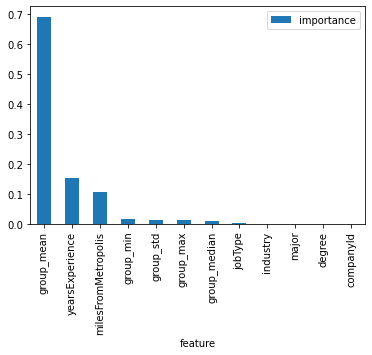

In [75]:
# Summarize results

# Select the model with the lowest error as your "prodcuction" model

models.print_summary()

# Saves results

models.save_results()